In [1]:
import sys
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
import torch

sys.path.append("..")

from deep_patent.retrieve import compute_similarity_scores
from deep_patent.utils import load_model
from dirtorch.datasets.generic import ImageList

In [2]:
DATASET_ROOT = "../db/epo_samples/"
DB_IMAGE_LIST_PATH = "../data/epo_db_samples.txt"

# model parameters
THREADS = 8
GEMP = 3
POOLING = "gem"
TRFS = ""

In [3]:
QRY_IMAGES = [
    "CN_202474956_U_input.png",
    # "I20181127/USD0834581-20181127/USD0834581-20181127-D00001.png",
    # "I20181127/USD0834581-20181127/USD0834581-20181127-D00010.png",
    # "I20180109/USD0807264-20180109/USD0807264-20180109-D00004.png",
    # "I20180109/USD0807264-20180109/USD0807264-20180109-D00001.png",
    # "I20190108/USD0837845-20190108/USD0837845-20190108-D00001.png ",
    # "I20190108/USD0837845-20190108/USD0837845-20190108-D00000.png ",
    # "I20180403/USD0814336-20180403/USD0814336-20180403-D00003.png ",
    # "I20180403/USD0814336-20180403/USD0814336-20180403-D00002.png ",
    # "I20190305/USD0842080-20190305/USD0842080-20190305-D00007.png ",
    # "I20190305/USD0842080-20190305/USD0842080-20190305-D00004.png ",
    # "I20190108/USD0837564-20190108/USD0837564-20190108-D00003.png ",
    # "I20190108/USD0837564-20190108/USD0837564-20190108-D00005.png ",
    # "I20180403/USD0814383-20180403/USD0814383-20180403-D00007.png ",
    # "I20180227/USD0811664-20180227/USD0811664-20180227-D00002.png ",
    # "I20180403/USD0814383-20180403/USD0814383-20180403-D00001.png ",
    # "I20180227/USD0811664-20180227/USD0811664-20180227-D00004.png ",
    # "I20180918/USD0828901-20180918/USD0828901-20180918-D00001.png ",
    # "I20180918/USD0828901-20180918/USD0828901-20180918-D00006.png ",
    # "I20180227/USD0811453-20180227/USD0811453-20180227-D00006.png ",
]

db_dataset = ImageList(img_list_path=DB_IMAGE_LIST_PATH, root=DATASET_ROOT)
qry_dataset = ImageList(
    img_list_path=DB_IMAGE_LIST_PATH,
    root=DATASET_ROOT,
    imgs=QRY_IMAGES,
)

In [4]:
net = load_model(
    "../checkpoints/PatentNet_Tri_GeM.pth.tar",
    iscuda=False,
    arch="resnet50_rmac",
    image_size=256,
)
net.pca = None

=> loading checkpoint '../checkpoints/PatentNet_Tri_GeM.pth.tar' (epoch 14)


In [9]:
scores = compute_similarity_scores(
    qry_images=qry_dataset,
    db_images=db_dataset,
    net=net,    
)

In [10]:
scores[0]

array([0.97367686, 0.9721581 , 0.9780269 , 0.97243243, 0.9859974 ,
       0.99034774, 0.9907635 , 0.99291074, 0.99068207, 0.9790989 ,
       0.97579265, 0.9800336 , 0.9721981 , 0.97850233, 0.9765059 ,
       0.97648406, 0.97619486, 0.9666216 , 0.97163135, 0.9689189 ,
       0.9723658 , 0.96447253, 0.9514174 , 0.96525496, 0.97659814,
       0.9787389 , 0.9736256 , 0.97062683, 0.99057686, 0.9913581 ,
       0.98079526, 0.99704325, 0.98748636, 0.98102003, 0.9507427 ,
       0.98111343], dtype=float32)

In [11]:
scores_idxs = []
for q, _scores in enumerate(scores):
    scores_idxs.append((-_scores).argsort())
scores_idxs = np.vstack(scores_idxs)

# Have the users precompute sorted indices
scores_submit = scores_idxs[:, :10]
scores_submit

array([[31,  7, 29,  6,  8, 28,  5, 32,  4, 35]], dtype=int64)

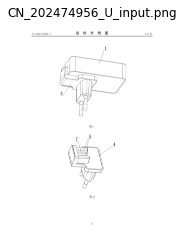

In [12]:
import matplotlib.pyplot as plt

def read_img(dataset_root: str, rel_img_path: str) -> np.ndarray:
    path_to_image = Path(dataset_root).joinpath(rel_img_path)
    return cv2.imread(str(path_to_image))

qry_idx = 0
img = read_img(DATASET_ROOT, QRY_IMAGES[qry_idx])

plt.title(QRY_IMAGES[qry_idx])
plt.axis('off')
_ = plt.imshow(img)

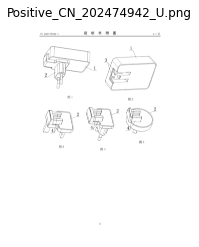

In [13]:
top_k = 0
db_idx = scores_submit[qry_idx][top_k]
img = read_img(DATASET_ROOT, db_dataset.imgs[db_idx])

plt.title(db_dataset.imgs[db_idx])
plt.axis('off')
_ = plt.imshow(img)

In [14]:
scores_submit[0]

array([31,  7, 29,  6,  8, 28,  5, 32,  4, 35], dtype=int64)